In [28]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [29]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [30]:
coordinates = list(lat_lngs)
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-75.83463348671216 -48.50262049448469
-36.31777984489473 133.68686144009973
26.89607211391018 41.34670949266791
2.3709893196265597 85.75925508672839
-37.56108967892549 63.53672928378106
-76.26626156902479 153.64563239685464
-65.98759911323334 -42.87213645248471
-51.732002152014566 19.33318132476475
81.53232089445771 12.388193892874625
-86.48000680814219 -43.055786186914304
51.09675227078054 -11.877682762425394
-57.50813160961162 -67.61859479282236
1.0142627578270407 67.77284936470363
61.65855150179709 147.34004969049153
-85.00200171356784 -77.44918764744122
-4.620079173443074 65.61776466937047
50.49182995957062 42.80626588289056
64.339754953827 -32.897011217151174
69.88236237631466 -81.68655082721413
-75.555349071528 163.61448427146945
15.552482600218397 -100.26193954053865
23.223713216739327 -173.98011529692909
-69.73511412353992 -75.79307420551191
4.811242731522825 120.63254239338886
87.92819216605167 -172.25418878463077
-65.15342823716068 162.86262570696232
2.181144023205377 110.853

In [31]:
from citipy import citipy

In [32]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [33]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [34]:
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [35]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | buraydah
Processing Record 4 of Set 1 | hambantota
Processing Record 5 of Set 1 | saint-philippe
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | dingle
Processing Record 10 of Set 1 | thinadhoo
Processing Record 11 of Set 1 | kholodnyy
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | novoanninskiy
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | acapulco
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | sapa
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | kuching
Processing Record 21 of Set 1 | illapel
Processing Recor

Processing Record 40 of Set 4 | san juan de los morros
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | sinjai
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | jamestown
Processing Record 45 of Set 4 | samusu
City not found. Skipping...
Processing Record 46 of Set 4 | paamiut
Processing Record 47 of Set 4 | kirakira
Processing Record 48 of Set 4 | mae hong son
Processing Record 49 of Set 4 | kununurra
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | necochea
Processing Record 2 of Set 5 | tancuayalab
City not found. Skipping...
Processing Record 3 of Set 5 | sarana
Processing Record 4 of Set 5 | rabo de peixe
Processing Record 5 of Set 5 | batagay-alyta
Processing Record 6 of Set 5 | xai-xai
Processing Record 7 of Set 5 | nadym
Processing Record 8 of Set 5 | port hedland
Processing Record 9 of Set 5 | saint-joseph
Processing Record 10 of Set 5 | port hardy
Processing Record 11 of Set 5 | luganville
Processing Record 12 

Processing Record 29 of Set 8 | damietta
Processing Record 30 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 31 of Set 8 | ganzhou
Processing Record 32 of Set 8 | nizhniy kislyay
Processing Record 33 of Set 8 | novocheremshansk
Processing Record 34 of Set 8 | dakar
Processing Record 35 of Set 8 | airai
Processing Record 36 of Set 8 | ciudad ojeda
Processing Record 37 of Set 8 | isoka
Processing Record 38 of Set 8 | lahat
Processing Record 39 of Set 8 | collie
Processing Record 40 of Set 8 | trinidad
Processing Record 41 of Set 8 | notodden
Processing Record 42 of Set 8 | meulaboh
Processing Record 43 of Set 8 | avera
Processing Record 44 of Set 8 | axim
Processing Record 45 of Set 8 | jinan
Processing Record 46 of Set 8 | puerto escondido
Processing Record 47 of Set 8 | balabac
Processing Record 48 of Set 8 | ulety
Processing Record 49 of Set 8 | caravelas
Processing Record 50 of Set 8 | cangzhou
Processing Record 1 of Set 9 | sao filipe
Processing Record 2 of Se

Processing Record 17 of Set 12 | lasa
Processing Record 18 of Set 12 | lomianki
Processing Record 19 of Set 12 | angoche
Processing Record 20 of Set 12 | arrigorriaga
Processing Record 21 of Set 12 | nuuk
Processing Record 22 of Set 12 | hamilton
Processing Record 23 of Set 12 | charters towers
Processing Record 24 of Set 12 | nome
Processing Record 25 of Set 12 | panaba
Processing Record 26 of Set 12 | ternate
Processing Record 27 of Set 12 | skotterud
Processing Record 28 of Set 12 | waingapu
Processing Record 29 of Set 12 | richards bay
Processing Record 30 of Set 12 | piacabucu
Processing Record 31 of Set 12 | asayita
City not found. Skipping...
Processing Record 32 of Set 12 | miri
Processing Record 33 of Set 12 | namatanai
Processing Record 34 of Set 12 | narsaq
Processing Record 35 of Set 12 | marcona
City not found. Skipping...
Processing Record 36 of Set 12 | aripuana
Processing Record 37 of Set 12 | boende
Processing Record 38 of Set 12 | korem
Processing Record 39 of Set 12 

In [36]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,60.46,29,0,9.22,AR,2022-11-12 22:35:50
1,Port Lincoln,-34.7333,135.8667,62.74,73,58,22.24,AU,2022-11-12 22:35:50
2,Buraydah,26.3260,43.9750,68.45,52,2,10.13,SA,2022-11-12 22:35:51
3,Hambantota,6.1241,81.1185,77.04,84,100,4.23,LK,2022-11-12 22:35:51
4,Saint-Philippe,-21.3585,55.7679,71.19,74,0,4.38,RE,2022-11-12 22:35:51
5,Bluff,-46.6000,168.3333,50.94,90,100,16.49,NZ,2022-11-12 22:35:52
6,Bredasdorp,-34.5322,20.0403,60.98,81,2,11.03,ZA,2022-11-12 22:35:52
7,Dingle,10.9995,122.6711,78.28,91,65,6.80,PH,2022-11-12 22:35:52
8,Thinadhoo,0.5333,72.9333,81.23,78,94,16.71,MV,2022-11-12 22:35:52
9,Kholodnyy,62.7167,147.9500,-22.68,99,95,0.78,RU,2022-11-12 22:35:53


In [39]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-11-12 22:35:50,-54.8000,-68.3000,60.46,29,0,9.22
1,Port Lincoln,AU,2022-11-12 22:35:50,-34.7333,135.8667,62.74,73,58,22.24
2,Buraydah,SA,2022-11-12 22:35:51,26.3260,43.9750,68.45,52,2,10.13
3,Hambantota,LK,2022-11-12 22:35:51,6.1241,81.1185,77.04,84,100,4.23
4,Saint-Philippe,RE,2022-11-12 22:35:51,-21.3585,55.7679,71.19,74,0,4.38
5,Bluff,NZ,2022-11-12 22:35:52,-46.6000,168.3333,50.94,90,100,16.49
6,Bredasdorp,ZA,2022-11-12 22:35:52,-34.5322,20.0403,60.98,81,2,11.03
7,Dingle,PH,2022-11-12 22:35:52,10.9995,122.6711,78.28,91,65,6.80
8,Thinadhoo,MV,2022-11-12 22:35:52,0.5333,72.9333,81.23,78,94,16.71
9,Kholodnyy,RU,2022-11-12 22:35:53,62.7167,147.9500,-22.68,99,95,0.78


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [41]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

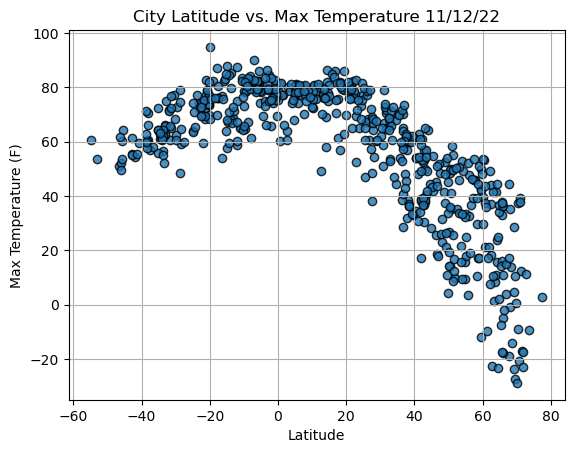

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

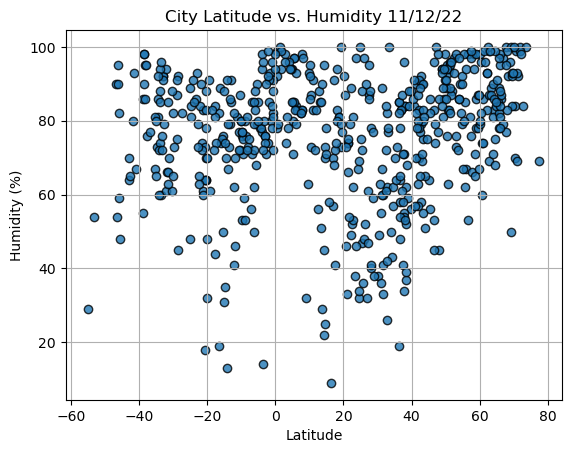

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

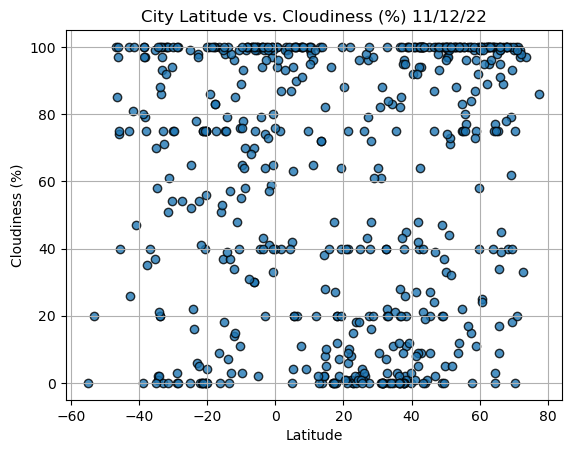

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

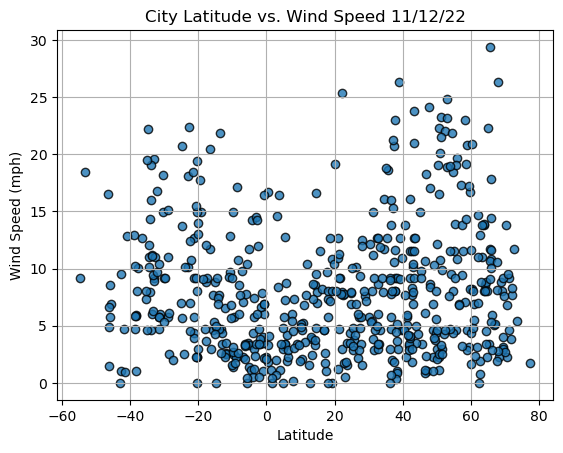

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()